# Import the libraries 

In [6]:
#import the reqired libraries
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.sparse
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds
import warnings; warnings.simplefilter('ignore')
%matplotlib inline

# Load the dataset and add headers

In [7]:
# Import the dataset and give the column names
# columns=['userId', 'productId', 'ratings','timestamp']
user_df=pd.read_excel('User_Rating.xlsx')

In [8]:
user_df.head()

,user,product_code,rating
0,1,1,3.5
1,1,3,3.5
2,1,5,3.5
3,1,7,3.5
4,1,9,3.5


# Dropping the timestamp column

In [9]:
# electronics_df.drop('timestamp',axis=1,inplace=True)

In [10]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382 entries, 0 to 381
Data columns (total 3 columns):
user            382 non-null int64
product_code    382 non-null int64
rating          382 non-null float64
dtypes: float64(1), int64(2)
memory usage: 9.1 KB


In [11]:
#Check the number of rows and columns
rows,columns = user_df.shape
print('Number of rows: ',rows)
print('Number of columns: ',columns)

Number of rows:  382
Number of columns:  3


In [12]:
#Check the datatypes
user_df.dtypes

user              int64
product_code      int64
rating          float64
dtype: object

* Since the data is very big. Consider electronics_df1 named dataframe with  first 50000 rows and all columns from 0 of dataset.

In [13]:
#Summary statistics of rating variable
user_df['rating'].describe().transpose()

count    382.000000
mean       3.893979
std        0.976705
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: rating, dtype: float64

In [14]:
#Find the minimum and maximum ratings

print('Minimum rating is: %d' %(user_df.rating.min()))
print('Maximum rating is: %d' %(user_df.rating.max()))

Minimum rating is: 1
Maximum rating is: 5


* Rating are on the scale 1 to 5.

# Handling Missing values

In [15]:
user_df = user_df.dropna()

In [16]:
#Check for missing values
print('Number of missing values across columns: \n',user_df.isnull().sum())

Number of missing values across columns: 
 user            0
product_code    0
rating          0
dtype: int64


* There are no missing records in the dataset.

## Ratings

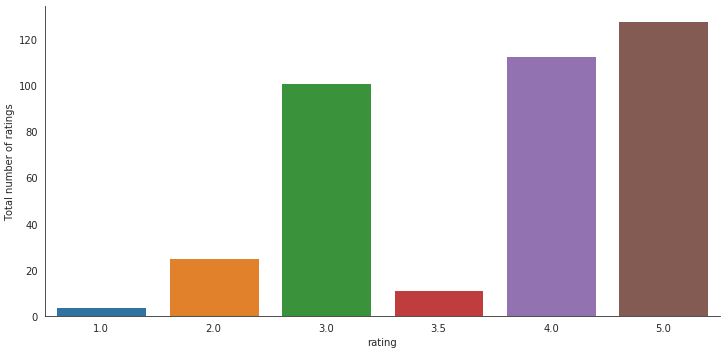

In [17]:
# Check the distribution of the rating
with sns.axes_style('white'):
    g = sns.factorplot("rating", data=user_df, aspect=2.0,kind='count')
    g.set_ylabels("Total number of ratings") 

* We can see that more number of users have given the rating of 5.

## Users and products

In [18]:
# Number of unique user id  in the data
print('Number of unique users in Raw data = ', user_df['user'].nunique())
# Number of unique product id  in the data
print('Number of unique product in Raw data = ', user_df['product_code'].nunique())

Number of unique users in Raw data =  27
Number of unique product in Raw data =  21


# Taking the subset of dataset to make it less sparse/ denser.

In [19]:
#Check the top 10 users based on ratings
most_rated = user_df.groupby('user').size().sort_values(ascending=False)[:10]
print('Top 10 users based on ratings: \n',most_rated)

Top 10 users based on ratings: 
 user
14    18
12    18
25    18
5     18
7     18
8     17
1     17
24    16
2     16
11    16
dtype: int64


In [20]:
counts = user_df.user.value_counts()

In [21]:
counts

14    18
12    18
25    18
5     18
7     18
8     17
1     17
24    16
2     16
11    16
9     16
4     16
17    15
26    15
22    15
18    14
21    14
27    13
16    13
13    13
3     11
10    11
6     11
15    10
23     9
19     9
20     5
Name: user, dtype: int64

In [22]:
user_df_final = user_df[user_df.user.isin(counts[counts>=5].index)]

In [23]:
print('Number of users who have rated 15 or more items =', len(user_df_final))
print('Number of unique users in the final data = ', user_df_final['user'].nunique())
print('Number of unique products in the final data = ', user_df_final['user'].nunique())

Number of users who have rated 15 or more items = 382
Number of unique users in the final data =  27
Number of unique products in the final data =  27


* electronics_df1_final has the users who have rated 25 or more items.

## ratings analysis in final dataset

In [24]:
user_df_final.head()

,user,product_code,rating
0,1,1,3.5
1,1,3,3.5
2,1,5,3.5
3,1,7,3.5
4,1,9,3.5


In [25]:
user_df_final['user'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27])

In [26]:
user_df_final.shape

(382, 3)

In [27]:
#constructing the pivot table
final_ratings_matrix = user_df_final.pivot_table(index='user',columns='product_code',values='rating')
# final_ratings_matrix = electronics_df1_final.pivot(index = 'product_code', columns ='user', values = 'rating').fillna(0)

In [28]:
final_ratings_matrix

product_code,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
user,,,,,,,,,,,,,,,,,,,,,
1,3.5,NaN,3.5,NaN,3.5,NaN,3.5,NaN,3.5,4.0,...,3.5,3.5,4.0,4.0,4.0,4.0,3.5,3.5,3.5,3.5
2,NaN,4.0,NaN,5.0,NaN,5.0,NaN,4.0,NaN,3.0,...,5.0,3.0,5.0,5.0,5.0,2.0,4.0,5.0,3.0,5.0
3,5.0,NaN,5.0,NaN,5.0,NaN,5.0,NaN,5.0,NaN,...,NaN,5.0,NaN,5.0,NaN,4.0,NaN,4.0,NaN,5.0
4,NaN,3.0,2.0,2.0,2.0,2.0,3.0,5.0,4.0,3.0,...,5.0,3.0,2.0,5.0,3.0,5.0,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,5.0,5.0,5.0,5.0,3.0,3.0,3.0,...,5.0,5.0,2.0,5.0,4.0,5.0,4.0,3.0,3.0,4.0
6,3.0,NaN,4.0,NaN,3.0,NaN,3.0,NaN,4.0,NaN,...,NaN,3.0,NaN,4.0,NaN,5.0,NaN,2.0,NaN,4.0
7,NaN,4.0,NaN,2.0,NaN,3.0,NaN,2.0,NaN,3.0,...,2.0,3.0,2.0,5.0,3.0,2.0,3.0,3.0,3.5,3.0
8,4.0,NaN,5.0,NaN,4.0,NaN,4.0,NaN,3.0,5.0,...,2.0,4.0,5.0,5.0,5.0,4.0,4.0,5.0,5.0,5.0
9,NaN,5.0,NaN,5.0,NaN,4.0,NaN,4.0,NaN,5.0,...,5.0,3.0,3.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0


* It shows that it is a sparse matrix. So, many cells are filled with 0 values.

In [29]:
print('Shape of final_ratings_matrix: ', final_ratings_matrix.shape)

Shape of final_ratings_matrix:  (27, 21)


In [30]:
#Calucating the density of the rating marix
given_num_of_ratings = np.count_nonzero(final_ratings_matrix)

print('given_num_of_ratings = ', given_num_of_ratings)

possible_num_of_ratings = final_ratings_matrix.shape[0] * final_ratings_matrix.shape[1]

print('possible_num_of_ratings = ', possible_num_of_ratings)

density = (given_num_of_ratings/possible_num_of_ratings)

density *= 100

print ('density: {:4.2f}%'.format(density))

given_num_of_ratings =  567
possible_num_of_ratings =  567
density: 100.00%


* The density value of the matrix also shows that it is a sparse matrix.

In [31]:
train_data = user_df_final

#  Building Collaborative Filtering recommender model.

In [32]:
user_df_CF = train_data
user_df_CF.head()

,user,product_code,rating
0,1,1,3.5
1,1,3,3.5
2,1,5,3.5
3,1,7,3.5
4,1,9,3.5


## User Based Collaborative Filtering model

In [33]:
# Matrix with row per 'user' and column per 'item' 
pivot_df = user_df_CF.pivot_table(index = 'user', columns ='product_code', values = 'rating').fillna(0)

In [34]:
pivot_df.head()

product_code,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
user,,,,,,,,,,,,,,,,,,,,,
1,3.5,0.0,3.5,0.0,3.5,0.0,3.5,0.0,3.5,4.0,...,3.5,3.5,4.0,4.0,4.0,4.0,3.5,3.5,3.5,3.5
2,0.0,4.0,0.0,5.0,0.0,5.0,0.0,4.0,0.0,3.0,...,5.0,3.0,5.0,5.0,5.0,2.0,4.0,5.0,3.0,5.0
3,5.0,0.0,5.0,0.0,5.0,0.0,5.0,0.0,5.0,0.0,...,0.0,5.0,0.0,5.0,0.0,4.0,0.0,4.0,0.0,5.0
4,0.0,3.0,2.0,2.0,2.0,2.0,3.0,5.0,4.0,3.0,...,5.0,3.0,2.0,5.0,3.0,5.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,5.0,5.0,5.0,5.0,3.0,3.0,3.0,...,5.0,5.0,2.0,5.0,4.0,5.0,4.0,3.0,3.0,4.0


In [35]:
print('Shape of the pivot table: ', pivot_df.shape)

Shape of the pivot table:  (27, 21)


In [36]:
#define user index from 0 to 10
pivot_df['user_index'] = np.arange(0, pivot_df.shape[0], 1)
pivot_df.head()

product_code,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,21,user_index
user,,,,,,,,,,,,,,,,,,,,,
1,3.5,0.0,3.5,0.0,3.5,0.0,3.5,0.0,3.5,4.0,...,3.5,4.0,4.0,4.0,4.0,3.5,3.5,3.5,3.5,0
2,0.0,4.0,0.0,5.0,0.0,5.0,0.0,4.0,0.0,3.0,...,3.0,5.0,5.0,5.0,2.0,4.0,5.0,3.0,5.0,1
3,5.0,0.0,5.0,0.0,5.0,0.0,5.0,0.0,5.0,0.0,...,5.0,0.0,5.0,0.0,4.0,0.0,4.0,0.0,5.0,2
4,0.0,3.0,2.0,2.0,2.0,2.0,3.0,5.0,4.0,3.0,...,3.0,2.0,5.0,3.0,5.0,0.0,0.0,0.0,0.0,3
5,0.0,0.0,0.0,5.0,5.0,5.0,5.0,3.0,3.0,3.0,...,5.0,2.0,5.0,4.0,5.0,4.0,3.0,3.0,4.0,4


In [37]:
pivot_df.set_index(['user_index'], inplace=True)
# Actual ratings given by users
pivot_df.head()

product_code,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
user_index,,,,,,,,,,,,,,,,,,,,,
0,3.5,0.0,3.5,0.0,3.5,0.0,3.5,0.0,3.5,4.0,...,3.5,3.5,4.0,4.0,4.0,4.0,3.5,3.5,3.5,3.5
1,0.0,4.0,0.0,5.0,0.0,5.0,0.0,4.0,0.0,3.0,...,5.0,3.0,5.0,5.0,5.0,2.0,4.0,5.0,3.0,5.0
2,5.0,0.0,5.0,0.0,5.0,0.0,5.0,0.0,5.0,0.0,...,0.0,5.0,0.0,5.0,0.0,4.0,0.0,4.0,0.0,5.0
3,0.0,3.0,2.0,2.0,2.0,2.0,3.0,5.0,4.0,3.0,...,5.0,3.0,2.0,5.0,3.0,5.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,5.0,5.0,5.0,5.0,3.0,3.0,3.0,...,5.0,5.0,2.0,5.0,4.0,5.0,4.0,3.0,3.0,4.0


* As this is a sparse matrix we will use SVD.

### Singular Value Decomposition

In [38]:
# # Singular Value Decomposition
U, sigma, Vt = svds(pivot_df, k = 10)

* As sigma is not a diagonal matrix we have to convert it into diagonal matrix.

In [39]:
# Construct diagonal array in SVD
sigma = np.diag(sigma)
print('Diagonal matrix: \n',sigma)

Diagonal matrix: 
 [[ 5.45388953  0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          5.80075849  0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          6.44334472  0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          7.96302551  0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          9.53760262  0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.         11.85950027
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
  15.29015799  0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.         21.39198214  0.          0.        ]
 [ 0.          0.          0.        

In [40]:
#Predicted ratings
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 

# Convert predicted ratings to dataframe
preds_df = pd.DataFrame(all_user_predicted_ratings, columns = pivot_df.columns)

preds_df.head()

product_code,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
0,3.566092,-0.228946,3.618282,-0.037971,3.019407,-0.026587,3.639597,0.572571,3.512733,4.095313,...,3.057910,3.604845,3.855570,4.050046,4.141431,3.918835,3.518344,3.612693,3.497199,3.422805
1,-0.835724,4.291850,-0.180099,4.879405,-0.087278,4.642697,0.389334,3.583677,0.247724,4.262465,...,4.696046,3.497922,4.646476,5.781086,3.700895,2.621095,4.101165,4.587696,3.810654,4.384186
2,4.970763,0.123527,4.845176,-0.181536,5.102747,0.197043,5.165162,-0.153546,4.977032,0.048123,...,-0.116201,4.640939,0.270279,5.160783,-0.428718,4.287156,-0.013020,4.160835,0.373162,4.465028
3,0.487656,2.866362,1.641765,2.171871,2.569451,2.722326,2.648756,4.194161,3.499127,3.346915,...,4.567974,2.665450,2.123132,4.405428,3.670690,4.965875,0.093555,0.216648,-0.938755,0.196896
4,0.501320,0.631168,-0.502938,4.636426,4.371069,4.418936,4.779383,4.241371,3.868886,2.967781,...,4.436260,5.255506,2.735305,4.155912,3.802686,5.171741,3.307418,4.066096,3.332112,3.628666


In [41]:
# Recommend the items with the highest predicted ratings

def recommend_items(userID, pivot_df, preds_df, num_recommendations):
    # index starts at 0  
    user_idx = userID-1 
    # Get and sort the user's ratings
    sorted_user_ratings = pivot_df.iloc[user_idx].sort_values(ascending=False)
    #sorted_user_ratings
    sorted_user_predictions = preds_df.iloc[user_idx].sort_values(ascending=False)
    #sorted_user_predictions
    temp = pd.concat([sorted_user_ratings, sorted_user_predictions], axis=1)
    temp.index.name = 'Recommended Items'
    temp.columns = ['user_ratings', 'user_predictions']
    temp = temp.loc[temp.user_ratings == 0]   
    temp = temp.sort_values('user_predictions', ascending=False)
    print('\nBelow are the recommended items for user(user_id = {}):\n'.format(userID))
    print(temp.head(num_recommendations))

In [42]:
userID = 4
num_recommendations = 5
recommend_items(userID, pivot_df, preds_df, num_recommendations) 


Below are the recommended items for user(user_id = 4):

                   user_ratings  user_predictions
Recommended Items                                
1                           0.0          0.487656
19                          0.0          0.216648
21                          0.0          0.196896
18                          0.0          0.093555
20                          0.0         -0.938755


In [43]:
userID = 6
num_recommendations = 5
recommend_items(userID, pivot_df, preds_df, num_recommendations)


Below are the recommended items for user(user_id = 6):

                   user_ratings  user_predictions
Recommended Items                                
16                          0.0          0.484337
2                           0.0          0.248750
4                           0.0          0.124852
8                           0.0         -0.006331
14                          0.0         -0.025243


In [44]:
userID = 8
num_recommendations = 5
recommend_items(userID, pivot_df, preds_df, num_recommendations)


Below are the recommended items for user(user_id = 8):

                   user_ratings  user_predictions
Recommended Items                                
4                           0.0          0.348467
2                           0.0         -0.070681
6                           0.0         -0.134996
8                           0.0         -0.281948


* Since, it is a Collaborative recommender model, so, all the three users are given different recommendations based on users past behaviour.